## 散点图
* ```plt.figure()```：确定画布，一个画布可以被绘制多次 
* ```plt.scatter()```：在画布上绘制一次二维图   
* ```plt.legend() ```：显示图例,与scatter中的label同时出现  
* ```plt.show() ```：显示图像  

散点图是用于研究两个变量之间关系的经典基础图，如果数据中包含多个组，或者说多个分类，则可能需要用不同的颜色来可视化每个类别。

实现目标：
<img src="https://machinelearningplus.sirv.com/WP_www.machinelearningplus.com/2018/11/1/_/n/1_Scatterplot_Matplotlib-min.png" width=650 height=450>

### 0.导入包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

### 1.绘制一个简单的散点图

<Figure size 576x288 with 0 Axes>

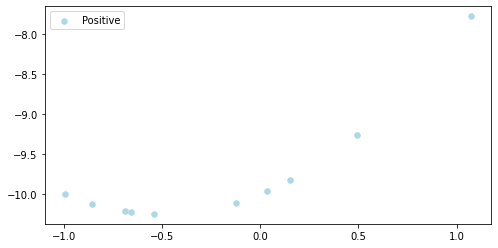

In [2]:
# 定义数据
x = np.random.randn(10)
y = x+x**2-10

# 确定画布
plt.figure(figsize=(8,4)) #figsize图像大小

# 绘图
plt.scatter(x,y,#横纵坐标
            s=30,#点的大小
            c="lightblue",#点的颜色
            label="Positive"#标签
           )

# 装饰图形
plt.legend()#显示图例,与scatter中的label同时出现
plt.show()#显示图像

### 2.绘制多类别散点图
* 数据
* 标签列表
* 标签列表对应的颜色列表

[[ 0.94074516  0.02854663]
 [-0.6540974   1.54972501]
 [ 1.28310287 -0.67004641]
 [-1.23962117 -1.68217817]
 [-2.24816222 -1.08301161]
 [ 0.03188876 -0.28127577]
 [-0.1538169   0.52166307]
 [ 1.05720205 -0.94797857]
 [-0.4832525   0.09415399]
 [-0.91682208  2.10167898]]


<Figure size 576x288 with 0 Axes>

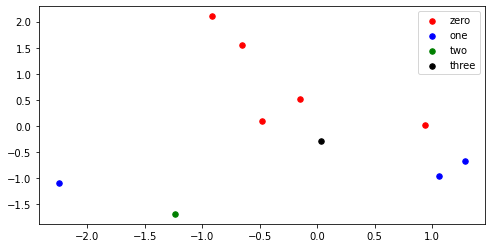

In [3]:
x = np.random.randn(10,2) # 10行两列的数据，每一行的两个数据分别为该样本点的横纵坐标
print(x)

# y的值由x中每一行的两个数据的映射结果，即类别，即 y[i]=f(x[i][0],x[i][1])
y = np.array([0,0,1,2,1,3,0,1,0,0])
classes = len(set(y)) #类别数

plt.figure(figsize=(8,4))

colors = ["red","blue","green","black"] #颜色列表
labels = ["zero","one","two","three"] #标签列表

# 标签有几个类别就在一张幕布上绘制几次，一次绘制一个类别的点
for i in range(classes):
    plt.scatter(x[y==i,0],
                x[y==i,1],
                s=30,
                c=colors[i],
                label=labels[i])

plt.legend()
plt.show()

### 3.实现原博中的图像

#### 3.1 导入数据并且观察
可以发现数据维度为332x29，也就是说有332个样本，每个样本有29个特征。观察原博的图像可以知道，这里用到的特征有```area```, ```poptotal```和```category```。

In [4]:
data = pd.read_csv("./data/midwest_filter.csv")
data.shape
data.head()
data.columns

(332, 29)

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


Index(['PID', 'county', 'state', 'area', 'poptotal', 'popdensity', 'popwhite',
       'popblack', 'popamerindian', 'popasian', 'popother', 'percwhite',
       'percblack', 'percamerindan', 'percasian', 'percother', 'popadults',
       'perchsd', 'percollege', 'percprof', 'poppovertyknown',
       'percpovertyknown', 'percbelowpoverty', 'percchildbelowpovert',
       'percadultpoverty', 'percelderlypoverty', 'inmetro', 'category',
       'dot_size'],
      dtype='object')

#### 3.2 通过索引提取出类别标签
可以看出，一共有14个类别。

In [5]:
categories = set(data['category'])
print(len(categories))
print(categories)

14
{'HAU', 'LAR', 'ALU', 'HLR', 'LAU', 'HHR', 'HAR', 'ALR', 'AAU', 'AAR', 'AHR', 'LHR', 'HLU', 'LHU'}


#### 3.3 标签对应颜色列表生成
只有几个类别的时候可以通过字符串来指定颜色，但是当类别数达到十几甚至几十几百时，这样明显是很麻烦的。这个时候可以使用[matplotlib色谱](https://matplotlib.org/tutorials/colors/colormaps.html)来自动生成颜色。在下面的函数内输入任意浮点数即可提取出一种颜色，返回以四个浮点数组成的RGBA色彩空间元组或者以三个浮点数组成的RGB色彩空间中的随机颜色。

* ```plt.cm.tab10()```：共有10种颜色
* ```plt.cm.tab20()```：共有20中颜色

In [6]:
color_test_10 = plt.cm.tab10(11.3)
color_test_20 = plt.cm.tab20(11.3)
print(color_test_10)
print(color_test_20)

(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0)
(0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0)


In [7]:
colors = [plt.cm.tab20(i/float(len(categories)-1)) for i in range(len(categories))]
print(len(colors))
print(colors)

14
[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274, 1.0), (1.0, 0.7333333333333333, 0.47058823529411764, 1.0), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0), (1.0, 0.596078431372549, 0.5882352941176471, 1.0), (0.7725490196078432, 0.6901960784313725, 0.8352941176470589, 1.0), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058, 1.0), (0.7803921568627451, 0.7803921568627451, 0.7803921568627451, 1.0), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0), (0.6196078431372549, 0.8549019607843137, 0.8980392156862745, 1.0)]


#### 3.4 绘制图像

<Figure size 2520x1440 with 0 Axes>

[(0.0, 90000.0), Text(0, 0.5, 'Population'), (0.0, 0.14), Text(0.5, 0, 'Area')]

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14]),
 <a list of 8 Text major ticklabel objects>)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]),
 <a list of 10 Text major ticklabel objects>)

Text(0.5, 1.0, 'Scatterplot of Midwest Area vs Population')

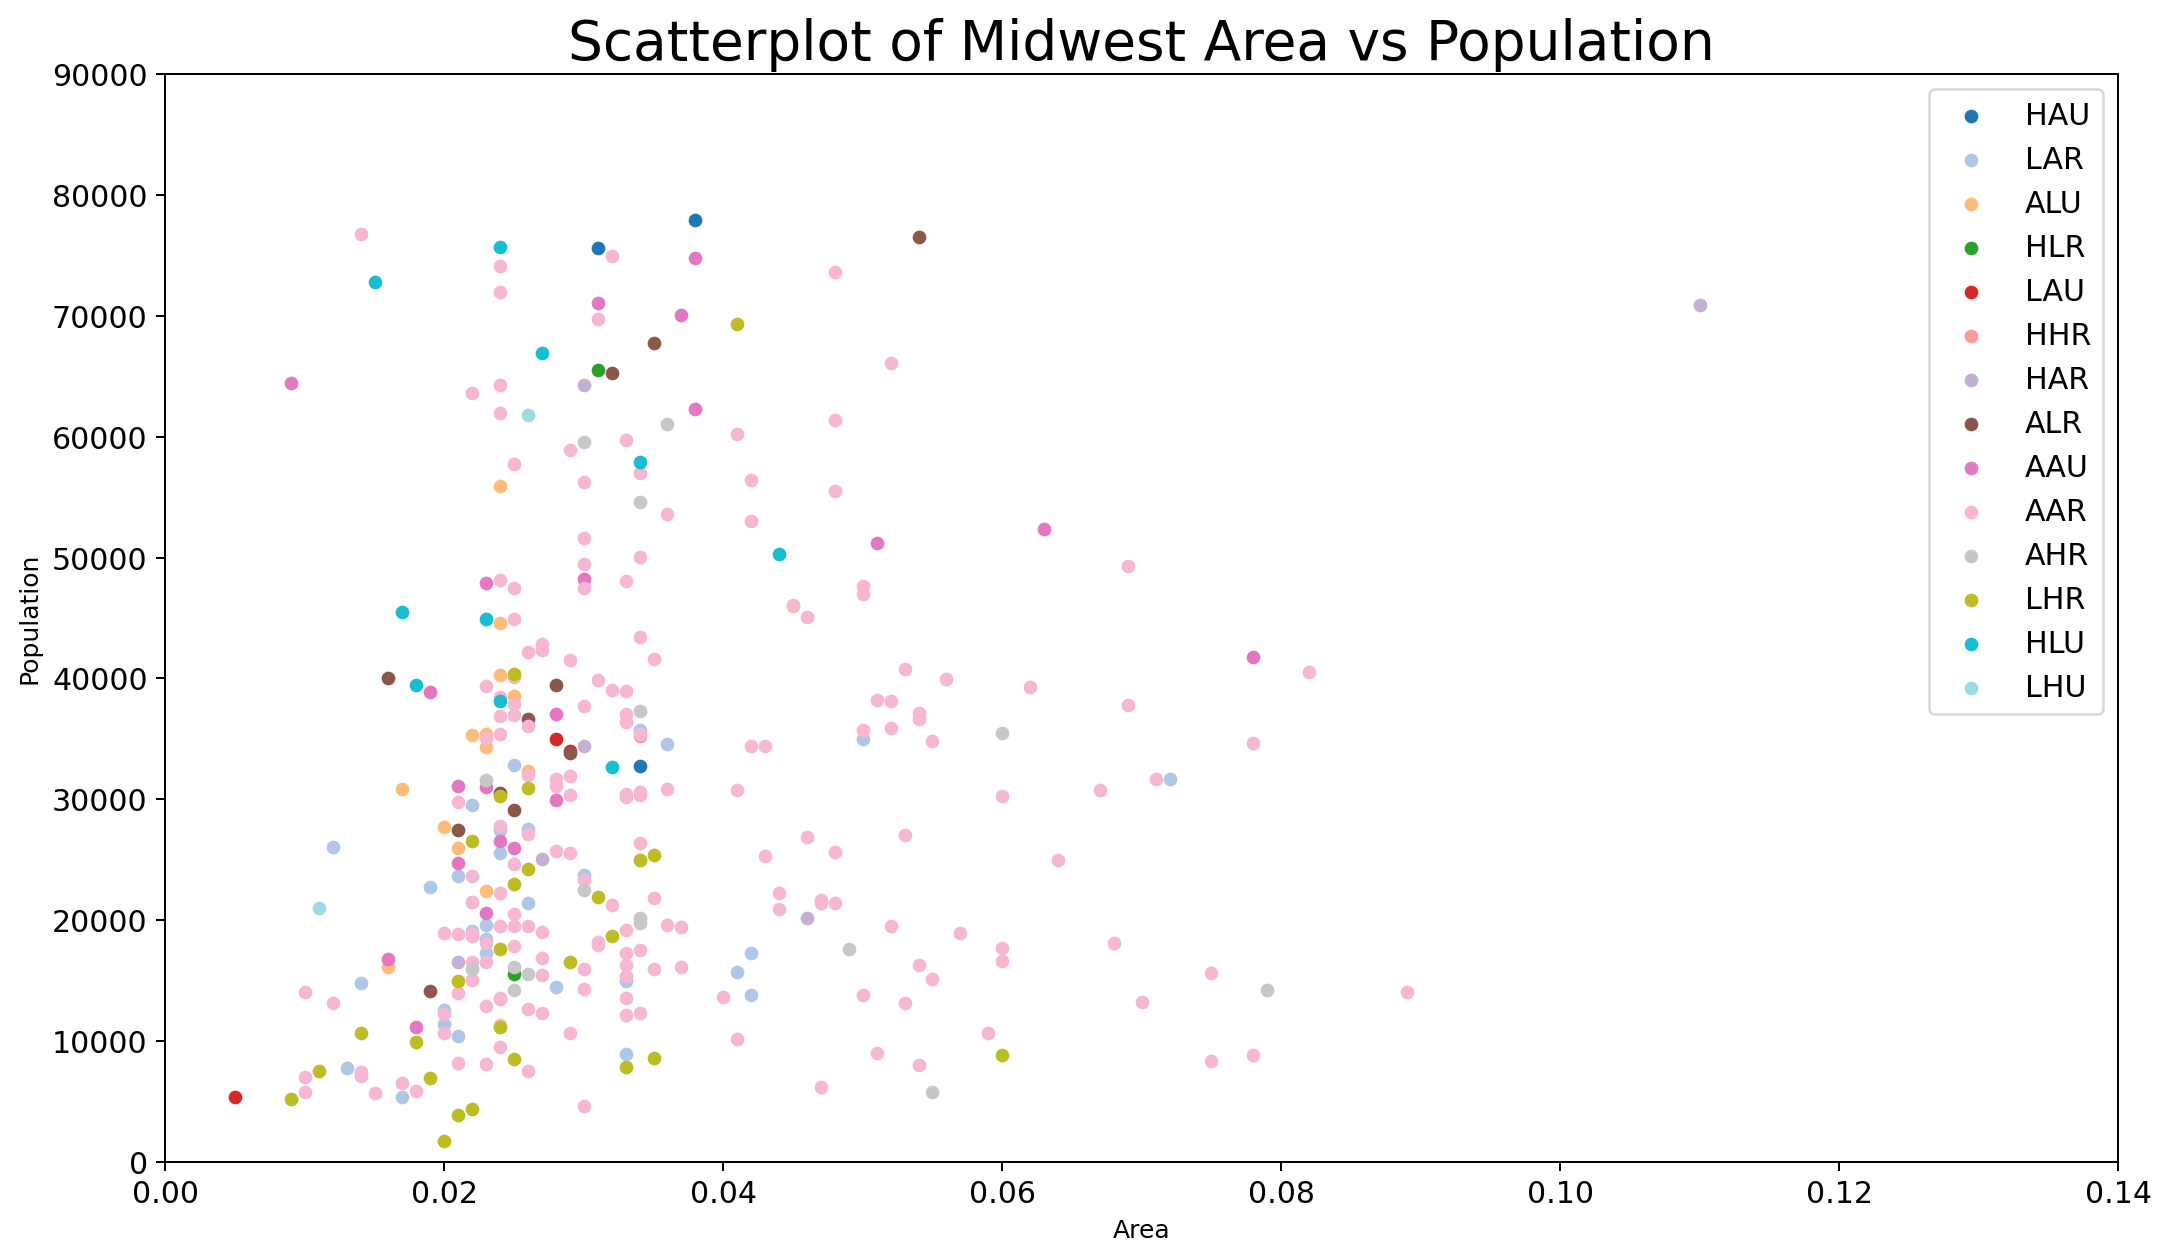

In [8]:
#plt.style.use('seaborn-whitegrid')
#sns.set_style('white')

plt.figure(figsize=(14, 8), #幕布尺寸
           dpi= 180, # 分辨率
           facecolor='w',# 背景颜色
           edgecolor='k' # 边框颜色
          )

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=data.loc[data.category==category,:], 
                s=20,
                c=np.array(colors[i]).reshape(1,-1),
                label=str(category))

# 对图像进行装饰
# plt.gca()获取当前子图
plt.gca().set(xlim=(0.0, 0.14), ylim=(0, 90000), #设置横纵坐标范围
              xlabel='Area', ylabel='Population') #横纵坐标名
plt.xticks(fontsize=12) #横坐标字体大小
plt.yticks(fontsize=12) #纵坐标字体大小

plt.title("Scatterplot of Midwest Area vs Population", fontsize=22) # 图像标题名
plt.legend(fontsize=12,loc='upper right')    
plt.show()    